<a href="https://colab.research.google.com/github/benvictoria21/AnalyzeStocks/blob/master/Stock_Fundamental_Analysis_and_Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
!sudo pip install yahoo_fin
!sudo pip install yfinance
!sudo pip install squarify

import pandas as pd
import yahoo_fin.stock_info as si
import yfinance as yf

import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import squarify

%matplotlib inline

In [16]:
company = "MSFT"

In [17]:
df = yf.Ticker(company).history(period='5y',interval='1d')

In [18]:
fig = go.Figure(data=[go.Candlestick(x=df.index,
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

fig.update_layout(title = f'{company}: Candlestick Price Chart', xaxis_tickfont_size = 14)
fig.update_layout(xaxis_rangeslider_visible = False)
    
fig.show()

In [19]:
plt.style.use('ggplot')

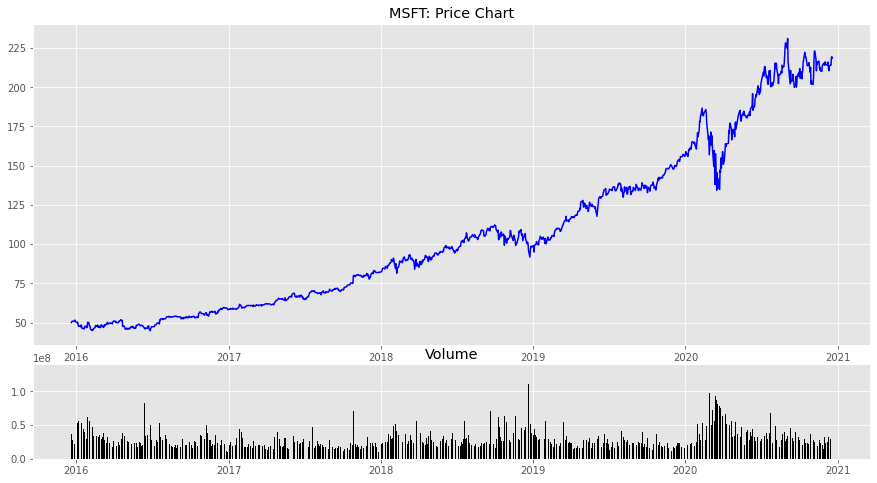

In [20]:
top = plt.subplot2grid((4,4), (0, 0), rowspan=3, colspan=4)
top.plot(df.index, df["Close"], color='blue')
plt.title(f'{company}: Price Chart')

bottom = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
bottom.bar(df.index, df['Volume'], color='black')
plt.title('Volume')

plt.gcf().set_size_inches(15,8)

In [21]:
try:
    bs = si.get_balance_sheet(company).iloc[:,0]
    bs.loc['cashAndShortTermInvestments'] = bs.loc['cash'] + bs.loc['shortTermInvestments']
except: 
    bs.loc['cashAndShortTermInvestments'] = bs.loc['cash']

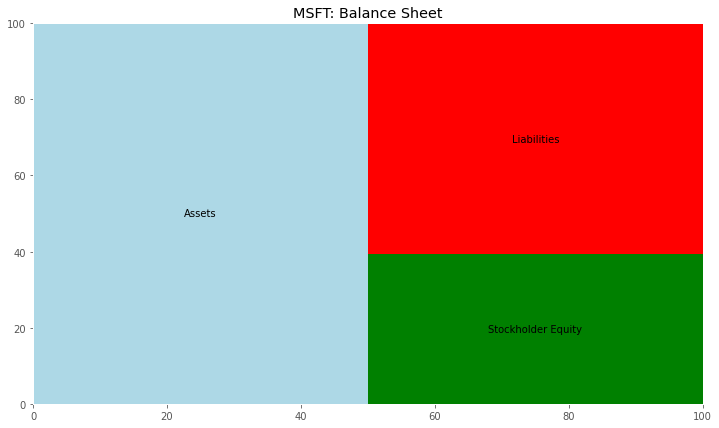

Total Assets: $301,311,000,000
Total Liabilities: $183,007,000,000
Total Equity: $118,304,000,000


In [22]:
temp = bs.loc[['totalAssets','totalStockholderEquity','totalLiab'],]

labels = ['Assets','Stockholder Equity','Liabilities']
colors = ['lightblue','green','red']
plt.figure(figsize=(12,7))
squarify.plot(temp, label=labels, color=colors) #value=temp
plt.title(f'{company}: Balance Sheet')
plt.show()

ta = bs.loc['totalAssets']
tl = bs.loc['totalLiab']
te = bs.loc['totalStockholderEquity']
print(f'Total Assets: ${ta:,}')
print(f'Total Liabilities: ${tl:,}')
print(f'Total Equity: ${te:,}')

In [23]:
i_s = si.get_income_statement(company)
temp = i_s.loc[['totalRevenue','grossProfit','operatingIncome','netIncome']]
temp = temp.T
temp

Breakdown,totalRevenue,grossProfit,operatingIncome,netIncome
endDate,,,,
2020-06-30,143015000000,96937000000,52959000000,44281000000
2019-06-30,125843000000,82933000000,42959000000,39240000000
2018-06-30,110360000000,72007000000,35058000000,16571000000
2017-06-30,96571000000,62310000000,29331000000,25489000000


In [24]:
trace0 = go.Bar(x = temp.index, y=temp['totalRevenue'],name='Total Revenue')
trace1 = go.Bar(x = temp.index, y=temp['grossProfit'],name='Gross Profit')
trace2 = go.Bar(x = temp.index, y=temp['operatingIncome'],name='Operating Profit')
trace3 = go.Bar(x = temp.index, y=temp['netIncome'],name='Net Profit')

data = [trace0,trace1,trace2,trace3]
layout=go.Layout(title = f'{company}: Revenue and Profits', barmode='group')
figure = go.Figure(data=data,layout=layout)

figure.show()

In [25]:
cf = si.get_cash_flow(company)

temp = cf.loc[['totalCashFromOperatingActivities','capitalExpenditures']]
temp = temp.T
temp['freeCashFlow'] = temp['totalCashFromOperatingActivities'] + temp['capitalExpenditures']
temp

Breakdown,totalCashFromOperatingActivities,capitalExpenditures,freeCashFlow
endDate,,,
2020-06-30,60675000000,-15441000000,45234000000
2019-06-30,52185000000,-13925000000,38260000000
2018-06-30,43884000000,-11632000000,32252000000
2017-06-30,39507000000,-8129000000,31378000000


In [26]:
fig = go.Figure()

fig.add_trace(go.Scatter(x = temp.index, y = temp['freeCashFlow'],mode = 'lines+markers', name="Free Cash Flow", marker_color='crimson'))
fig.add_trace(go.Bar(x=temp.index, y=temp['totalCashFromOperatingActivities'],name='Operating Income',marker_color='darkblue'))
fig.add_trace(go.Bar(x=temp.index, y=temp['capitalExpenditures'],name='Capital Expenditure',marker_color='darkred'))

fig.update_layout(title = f'{company}: Cash Flow Analaysis', xaxis_tickfont_size = 14)
fig.show()

In [27]:
try: 
    div = si.get_dividends(company)

    fig = go.Figure(data=[go.Table(
        header=dict(values=['Date','Dividends'],fill_color='grey',align='left',font=dict(color='white', size=12)),
        cells=dict(values=[div.index, div.dividend],fill_color=[['white','lightgrey']*len(div)],align='left',font = dict(color = 'darkslategray', size = 11)))
    ])

    fig.update_layout(
        title=f'{company}: Dividends per Share')

    fig.show()
except: 
    print(f'{company} does not provide dividends')
try: 
    div = si.get_dividends(company)
    fig = px.bar(div, x=div.index, y='dividend', title=f'{company}: Dividends', 
                 labels={"index":'Year', "dividend": "Dividends"})
    
    fig.show()
    
except: 
    print(f'{company} does not provide dividends')

In [28]:
try:
    div = si.get_dividends(company)
    temp = div.groupby(pd.Grouper(freq="Y")) 
    div_per_year = temp.sum()

    fig = px.bar(div_per_year, x=div_per_year.index, y='dividend', title=f'{company}: Dividends per Year', 
                 labels={"index":'Year', "dividend": "Dividends"})
    fig.update_traces(marker_color='#19D3F3')
    fig.show()
except: 
    print(f'{company} does not provide dividends')

In [29]:
holders = yf.Ticker(company).major_holders
holders = holders.iloc[0:2,]
holders.columns = ['a','b']
holders['a'] = holders['a'].apply(lambda x: x[:-1])
holders['a'] = pd.to_numeric(holders['a'])
holders.loc[len(holders),'a'] = 100 - holders.iloc[0,0] - holders.iloc[1,0]
holders.loc[len(holders),'b'] = 'Others'

In [30]:
labels = ['% of Shares Held by All Insider','% of Shares Held by Institutions','Others']
values = holders.a

fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0.2, 0.2, 0.2])])

fig.update_layout(title = 'Major Holders Breakdown')
fig.show()

In [31]:
compare = ['FB', 'AAPL', 'AMZN', 'NFLX', 'GOOG'] 

In [38]:
compare.insert(0,company)

In [39]:
company_stats = {}
for ticker in compare:
    temp = si.get_stats_valuation(ticker)
    temp = temp.iloc[:,:2]
    temp.columns = ["Attribute", "Current"]
    company_stats[ticker] = temp
    
stats = pd.concat(company_stats)

company_extra_stats = {}
for ticker in compare:
    company_extra_stats[ticker] = si.get_stats(ticker)

stats2 = pd.concat(company_extra_stats)

In [40]:
stats = stats.reset_index()
del stats['level_1']
stats.columns = ['Ticker','Attribute','Current']
stats = stats.pivot(index = "Ticker", columns="Attribute", values="Current")

In [41]:
stats.columns = ['Enterprise Value','Enterprise Value/EBITDA','Enterprise Value/Revenue','Forward P/E',
                 'Market Cap','PEG Ratio (5 yr expected)','Price/Book','Price/Sales (ttm)','Trailing P/E']

del stats['Enterprise Value'] 
del stats['Market Cap']
stats = stats.astype(float)
stats2 = stats2.reset_index()
del stats2["level_1"]
stats2.columns = ["Ticker", "Attribute", "Value"]

stats2 = stats2.pivot(index = 'Ticker', columns="Attribute", values="Value")
stats2 = stats2.loc[:,['Quarterly Earnings Growth (yoy)','Return on Equity (ttm)']]

stats2['Quarterly Earnings Growth (yoy)'] = stats2['Quarterly Earnings Growth (yoy)'].str.strip('%').astype('float') / 100.0
stats2['Return on Equity (ttm)'] = stats2['Return on Equity (ttm)'].str.strip('%').astype('float') / 100.0
stats = pd.concat([stats, stats2], axis=1, join='inner')
stats

,Enterprise Value/EBITDA,Enterprise Value/Revenue,Forward P/E,PEG Ratio (5 yr expected),Price/Book,Price/Sales (ttm),Trailing P/E,Quarterly Earnings Growth (yoy),Return on Equity (ttm)
Ticker,,,,,,,,,
AAPL,26.84,7.92,31.95,3.18,32.96,8.09,38.61,-0.074,0.7369
AMZN,35.24,4.65,60.61,1.24,19.41,4.68,93.62,1.967,0.2495
FB,20.36,9.30,25.13,0.92,6.62,9.98,31.16,0.288,0.2388
GOOG,19.84,6.19,30.21,1.52,5.50,6.95,33.48,0.591,0.1751
MSFT,22.19,10.78,32.47,2.53,13.39,11.39,35.26,0.301,0.4140
NFLX,16.84,10.23,60.24,2.26,22.85,10.17,86.34,0.187,0.3264


In [42]:
fig = px.scatter(stats,
                 x='Quarterly Earnings Growth (yoy)', y='Enterprise Value/EBITDA',size='Return on Equity (ttm)', height = 700,
                 text=stats.index, title="Value to Growth Comparison",color=stats.index)

fig.update_traces(textposition = 'top center')
fig.update_layout(showlegend = False)
fig.update_layout(xaxis_rangeslider_visible = False)
fig.show()